In [1]:
import os

import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
base_dir_summaries = os.path.abspath('./result_summary')

In [4]:
path_no_drift = os.path.join(base_dir_summaries, 'no_local_drift.csv')
path_only_local_drift = os.path.join(base_dir_summaries, 'only_local_drift.csv')
path_disappearing = os.path.join(base_dir_summaries, 'disappearing_distribution_all.csv')
path_global_drift = os.path.join(base_dir_summaries, 'global_drift_all.csv')

#### No drift experiments

In [5]:
cols_tested_params_no_drift = ['acceptability_threshold', 
                               'dim_data', 
                               'ideal_cluster_num_deviation'                     
                              ]

In [6]:
df_no_drift = pd.read_csv(path_no_drift)
df_no_drift.dropna(subset=['filename'], inplace=True)

In [7]:
df_no_drift.shape

(27, 40)

In [8]:
df_no_drift.head()

,Start Time,Duration,Run ID,Name,Source Type,Source Name,User,Status,acceptability_threshold,dim_data,drifting_clients,filename,ideal_cluster_num,ideal_cluster_num_deviation,initial_points_per_generator,m,max_iter_global,max_iter_local,mean_max_val,mean_min_val,n_clients,n_generators_per_client,n_repeats,n_time_steps,n_unused_client_generators,next_timestep_new_points_per_generator,num_clusters_used,ratio_drifted_clients,ratio_new_data_distribution,ratio_unused_client_generators,run_mode,tol_global,tol_local,drift_detected_counter,false_positive_rate,initial_global_db_max,initial_global_db_mean,initial_global_db_median,initial_global_db_min,initial_global_db_std
0,2024-01-08 09:56:48,252ms,da748d657369430c834677db3ca2fe01,NaN,LOCAL,/home/morris/UM/phd/code/fed_drift_data_genera...,morris,FINISHED,0.010,2,5,./results/no_local_drift_2024-01-08_09-56-48_r...,10,0.5,1000,2,10,50,5,-5,10,1,20,10,0.0,100,15,0.5,0.1,0.0,no_local_drift,0.01,0.001,38,0.190,0.525907,0.450532,0.451299,0.377608,0.033617
2,2024-01-08 09:48:40,258ms,6a6d21beda044030bd077e3897ba44c9,NaN,LOCAL,/home/morris/UM/phd/code/fed_drift_data_genera...,morris,FINISHED,0.010,2,5,./results/no_local_drift_2024-01-08_09-48-40_r...,10,0.0,1000,2,10,50,5,-5,10,1,20,10,0.0,100,10,0.5,0.1,0.0,no_local_drift,0.01,0.001,21,0.105,0.655037,0.521645,0.514196,0.430448,0.062752
4,2024-01-08 09:46:15,263ms,44ffe918ec63402e8305c7b54d5927fc,NaN,LOCAL,/home/morris/UM/phd/code/fed_drift_data_genera...,morris,FINISHED,0.010,2,5,./results/no_local_drift_2024-01-08_09-46-15_r...,10,-0.5,1000,2,10,50,5,-5,10,1,20,10,0.0,100,5,0.5,0.1,0.0,no_local_drift,0.01,0.001,4,0.020,0.778567,0.527159,0.525895,0.449334,0.073585
6,2024-01-08 10:10:22,253ms,3aaa5e90ec53468bb2ea8f424500a668,NaN,LOCAL,/home/morris/UM/phd/code/fed_drift_data_genera...,morris,FINISHED,0.025,2,5,./results/no_local_drift_2024-01-08_10-10-22_r...,10,0.5,1000,2,10,50,5,-5,10,1,20,10,0.0,100,15,0.5,0.1,0.0,no_local_drift,0.01,0.001,1,0.005,0.554000,0.420451,0.413194,0.316531,0.045504
7,2024-01-08 10:26:15,285ms,5e8362e8f7b04ead94896e4a0e82e76c,NaN,LOCAL,/home/morris/UM/phd/code/fed_drift_data_genera...,morris,FINISHED,0.050,100,5,./results/no_local_drift_2024-01-08_10-26-15_r...,10,0.5,1000,2,10,50,5,-5,10,1,20,10,0.0,100,15,0.5,0.1,0.0,no_local_drift,0.01,0.001,0,0.000,43971.822170,35107.479822,34874.505917,26416.431319,4618.612055


In [9]:
all(df_no_drift.groupby(cols_tested_params_no_drift).count()==1)

True

In [10]:
def display_performance_per_param_col(df, param_cols, metric_col):

    for param_col in param_cols:
        display(df.groupby(param_col).agg({metric_col: ['mean', 'median', 'min', 'max', 'count'],
                                           #'initial_global_db_mean': ['mean', 'median', 'min', 'max']
                                          }))

In [11]:
mean_all = df_no_drift['false_positive_rate'].mean()

print(f'Mean false positive rate across all experiments: {mean_all:.4f}')

Mean false positive rate across all experiments: 0.0119


In [12]:
display_performance_per_param_col(df=df_no_drift,
                                  param_cols=cols_tested_params_no_drift,
                                  metric_col='false_positive_rate'
                                 )

false_positive_rate                         
                                       mean median  min    max count
acceptability_threshold                                             
0.010                              0.035000    0.0  0.0  0.190     9
0.025                              0.000556    0.0  0.0  0.005     9
0.050                              0.000000    0.0  0.0  0.000     9

false_positive_rate                        
                        mean median  min   max count
dim_data                                            
2                   0.035556    0.0  0.0  0.19     9
25                  0.000000    0.0  0.0  0.00     9
100                 0.000000    0.0  0.0  0.00     9

false_positive_rate                         
                                           mean median  min    max count
ideal_cluster_num_deviation                                             
-0.5                                   0.002222    0.0  0.0  0.020     9
 0.0                                   0.011667    0.0  0.0  0.105     9
 0.5                                   0.021667    0.0  0.0  0.190     9

In [13]:
df_no_drift[df_no_drift['false_positive_rate']>0][cols_tested_params_no_drift + ['false_positive_rate']]

,acceptability_threshold,dim_data,ideal_cluster_num_deviation,false_positive_rate
0,0.010,2,0.5,0.190
2,0.010,2,0.0,0.105
4,0.010,2,-0.5,0.020
6,0.025,2,0.5,0.005


<AxesSubplot:xlabel='acceptability_threshold,dim_data,ideal_cluster_num_deviation'>

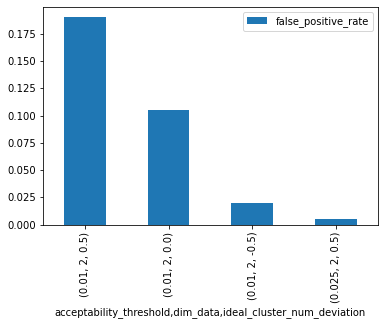

In [14]:
df_no_drift[df_no_drift['false_positive_rate']>0].set_index(cols_tested_params_no_drift).plot(kind='bar', y='false_positive_rate')

In [15]:
(df_no_drift[cols_tested_params_no_drift + ['false_positive_rate', 'initial_global_db_mean']].corr()[cols_tested_params_no_drift + ['false_positive_rate', 'initial_global_db_mean']].dropna()).round(4)

,acceptability_threshold,dim_data,ideal_cluster_num_deviation,false_positive_rate,initial_global_db_mean
acceptability_threshold,1.0000,0.0000,0.0000,-0.3229,-0.0123
dim_data,0.0000,1.0000,-0.0000,-0.2838,0.3939
ideal_cluster_num_deviation,0.0000,-0.0000,1.0000,0.1972,0.6089
false_positive_rate,-0.3229,-0.2838,0.1972,1.0000,-0.1464
initial_global_db_mean,-0.0123,0.3939,0.6089,-0.1464,1.0000


#### Local only drift

In [16]:
path_only_local_drift

'/home/morris/UM/phd/code/fed_drift_data_generator/result_summary/only_local_drift.csv'

In [17]:
df_local_drift = pd.read_csv(path_only_local_drift)
df_local_drift.dropna(subset=['filename'], inplace=True)
df_local_drift.shape

(27, 40)

In [18]:
cols_params_local_drift = cols_tested_params_no_drift

In [19]:
mean_all_local_drift = df_local_drift['false_positive_rate'].mean()

print(f'Mean false positive rate across all experiments: {mean_all_local_drift:.4f}')

Mean false positive rate across all experiments: 0.0083


In [20]:
df_local_drift.head()

,Start Time,Duration,Run ID,Name,Source Type,Source Name,User,Status,acceptability_threshold,dim_data,drifting_clients,filename,ideal_cluster_num,ideal_cluster_num_deviation,initial_points_per_generator,m,max_iter_global,max_iter_local,mean_max_val,mean_min_val,n_clients,n_generators_per_client,n_repeats,n_time_steps,n_unused_client_generators,next_timestep_new_points_per_generator,num_clusters_used,ratio_drifted_clients,ratio_new_data_distribution,ratio_unused_client_generators,run_mode,tol_global,tol_local,drift_detected_counter,false_positive_rate,initial_global_db_max,initial_global_db_mean,initial_global_db_median,initial_global_db_min,initial_global_db_std
0,2024-01-08 09:45:52,245ms,148cd5b513be40debcff35141df4280d,NaN,LOCAL,/home/morris/UM/phd/code/fed_drift_data_genera...,morris,FINISHED,0.05,100,5,./results/local_but_no_global_drift_2024-01-08...,10,0.5,1000,2,10,50,5,-5,10,1,20,10,0.0,100,15,0.5,0.1,0.0,local_but_no_global_drift,0.01,0.001,0,0.0,43067.889652,34486.778653,34604.788953,26115.040787,4583.369832
1,2024-01-08 09:45:03,246ms,d186743b677843d4b28a38e7637d637c,NaN,LOCAL,/home/morris/UM/phd/code/fed_drift_data_genera...,morris,FINISHED,0.05,100,5,./results/local_but_no_global_drift_2024-01-08...,10,0.0,1000,2,10,50,5,-5,10,1,20,10,0.0,100,10,0.5,0.1,0.0,local_but_no_global_drift,0.01,0.001,0,0.0,0.209474,0.201686,0.201547,0.196068,0.003186
2,2024-01-08 09:44:36,260ms,26cb87d655264849bd5f8f2ac34ef3d9,NaN,LOCAL,/home/morris/UM/phd/code/fed_drift_data_genera...,morris,FINISHED,0.05,100,5,./results/local_but_no_global_drift_2024-01-08...,10,-0.5,1000,2,10,50,5,-5,10,1,20,10,0.0,100,5,0.5,0.1,0.0,local_but_no_global_drift,0.01,0.001,0,0.0,0.481509,0.463385,0.462922,0.446667,0.007829
3,2024-01-08 09:44:22,270ms,91c2721fcf094716aecb7f0889da392d,NaN,LOCAL,/home/morris/UM/phd/code/fed_drift_data_genera...,morris,FINISHED,0.05,25,5,./results/local_but_no_global_drift_2024-01-08...,10,0.5,1000,2,10,50,5,-5,10,1,20,10,0.0,100,15,0.5,0.1,0.0,local_but_no_global_drift,0.01,0.001,0,0.0,24553.746382,17028.069454,16631.391305,11434.080686,4000.941703
4,2024-01-08 09:43:43,260ms,59be950e4d4c4877bafc706808627d77,NaN,LOCAL,/home/morris/UM/phd/code/fed_drift_data_genera...,morris,FINISHED,0.05,25,5,./results/local_but_no_global_drift_2024-01-08...,10,0.0,1000,2,10,50,5,-5,10,1,20,10,0.0,100,10,0.5,0.1,0.0,local_but_no_global_drift,0.01,0.001,0,0.0,0.232790,0.221904,0.220791,0.211471,0.006282


In [21]:
display_performance_per_param_col(df=df_local_drift,
                                  param_cols=cols_tested_params_no_drift,
                                  metric_col='false_positive_rate'
                                 )

false_positive_rate                         
                                       mean median  min    max count
acceptability_threshold                                             
0.010                                 0.025    0.0  0.0  0.145     9
0.025                                 0.000    0.0  0.0  0.000     9
0.050                                 0.000    0.0  0.0  0.000     9

false_positive_rate                         
                        mean median  min    max count
dim_data                                             
2                      0.025    0.0  0.0  0.145     9
25                     0.000    0.0  0.0  0.000     9
100                    0.000    0.0  0.0  0.000     9

false_positive_rate                         
                                           mean median  min    max count
ideal_cluster_num_deviation                                             
-0.5                                   0.000556    0.0  0.0  0.005     9
 0.0                                   0.008333    0.0  0.0  0.075     9
 0.5                                   0.016111    0.0  0.0  0.145     9

In [22]:
df_local_drift.sort_values('false_positive_rate', inplace=True, ascending=False)

<AxesSubplot:xlabel='acceptability_threshold,dim_data,ideal_cluster_num_deviation'>

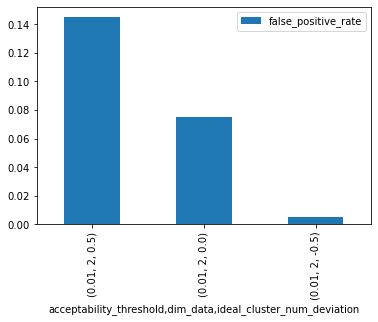

In [23]:
df_local_drift[df_local_drift['false_positive_rate']>0].set_index(cols_tested_params_no_drift).plot(kind='bar', y='false_positive_rate')

In [24]:
df_local_drift[cols_params_local_drift + ['false_positive_rate']].head()

,acceptability_threshold,dim_data,ideal_cluster_num_deviation,false_positive_rate
52,0.010,2,0.5,0.145
50,0.010,2,0.0,0.075
47,0.010,2,-0.5,0.005
14,0.025,25,-0.5,0.000
23,0.010,25,-0.5,0.000


#### Global drift new distribution

In [25]:
df_global_drift = pd.read_csv(path_global_drift)
df_global_drift.dropna(subset=['filename'], inplace=True)
df_global_drift.shape

(108, 40)

In [26]:
cols_global_drift_params = ['acceptability_threshold', 
                               'dim_data',
                               'ideal_cluster_num_deviation',
                               'ratio_new_data_distribution']

In [27]:
df_global_drift.head()

,Start Time,Duration,Run ID,Name,Source Type,Source Name,User,Status,acceptability_threshold,dim_data,drifting_clients,filename,ideal_cluster_num,ideal_cluster_num_deviation,initial_points_per_generator,m,max_iter_global,max_iter_local,mean_max_val,mean_min_val,n_clients,n_generators_per_client,n_repeats,n_time_steps,n_unused_client_generators,next_timestep_new_points_per_generator,num_clusters_used,ratio_drifted_clients,ratio_new_data_distribution,ratio_unused_client_generators,run_mode,tol_global,tol_local,drift_detected_counter,initial_global_db_max,initial_global_db_mean,initial_global_db_median,initial_global_db_min,initial_global_db_std,true_positive_rate
0,2024-01-08 09:04:56,256ms,432abaad607944578b709f93b300146f,NaN,LOCAL,/home/morris/UM/phd/code/fed_drift_data_genera...,morris,FINISHED,0.05,100,5,./results/global_drift_2024-01-08_09-04-56_res...,10,0.5,1000,2,10,50,5,-5,10,1,20,10,0.0,100,15,0.5,1.0,0.0,global_drift,0.01,0.001,176,44039.958386,36513.556327,36916.120610,25991.603858,5031.618481,0.880
1,2024-01-08 09:03:52,242ms,cd6a891525154b188e7687229e4bf6a9,NaN,LOCAL,/home/morris/UM/phd/code/fed_drift_data_genera...,morris,FINISHED,0.05,100,5,./results/global_drift_2024-01-08_09-03-52_res...,10,0.5,1000,2,10,50,5,-5,10,1,20,10,0.0,100,15,0.5,0.9,0.0,global_drift,0.01,0.001,169,41073.450005,35395.300509,36602.689475,27263.623578,3703.563089,0.845
2,2024-01-08 09:02:46,230ms,0147e4a5eacb480190dfd65fdf1f7697,NaN,LOCAL,/home/morris/UM/phd/code/fed_drift_data_genera...,morris,FINISHED,0.05,100,5,./results/global_drift_2024-01-08_09-02-45_res...,10,0.5,1000,2,10,50,5,-5,10,1,20,10,0.0,100,15,0.5,0.5,0.0,global_drift,0.01,0.001,117,42332.425262,35578.350906,35882.040000,29174.976385,3348.868518,0.585
3,2024-01-08 09:01:40,255ms,5c36fbfbc2f641de8e906ce83b5e386a,NaN,LOCAL,/home/morris/UM/phd/code/fed_drift_data_genera...,morris,FINISHED,0.05,100,5,./results/global_drift_2024-01-08_09-01-40_res...,10,0.5,1000,2,10,50,5,-5,10,1,20,10,0.0,100,15,0.5,0.1,0.0,global_drift,0.01,0.001,0,40064.188675,34245.321979,33812.686534,26651.305751,4174.675870,0.000
4,2024-01-08 09:00:34,255ms,9ac40dd517ee4540b28fef132a29eed7,NaN,LOCAL,/home/morris/UM/phd/code/fed_drift_data_genera...,morris,FINISHED,0.05,100,5,./results/global_drift_2024-01-08_09-00-34_res...,10,0.0,1000,2,10,50,5,-5,10,1,20,10,0.0,100,10,0.5,1.0,0.0,global_drift,0.01,0.001,200,0.204469,0.201609,0.201538,0.198286,0.001684,1.000


In [28]:
mean_all_global_drift = df_global_drift['true_positive_rate'].mean()

print(f'Mean true positive rate across all experiments: {mean_all_global_drift:.4f}')

Mean true positive rate across all experiments: 0.6684


In [29]:
display_performance_per_param_col(df=df_global_drift,
                                  param_cols=cols_global_drift_params,
                                  metric_col='true_positive_rate'
                                 )

true_positive_rate                        
                                      mean  median  min  max count
acceptability_threshold                                           
0.010                             0.827639  0.9325  0.3  1.0    36
0.025                             0.661667  0.8325  0.0  1.0    36
0.050                             0.515833  0.5875  0.0  1.0    36

true_positive_rate                         
                       mean  median  min   max count
dim_data                                            
2                  0.565139  0.5900  0.0  0.94    36
25                 0.702222  0.8675  0.0  1.00    36
100                0.737778  0.9325  0.0  1.00    36

true_positive_rate                          
                                          mean  median  min    max count
ideal_cluster_num_deviation                                             
-0.5                                  0.612083  0.7675  0.0  1.000    36
 0.0                                  0.712778  0.9325  0.0  1.000    36
 0.5                                  0.680278  0.8100  0.0  0.985    36

true_positive_rate                          
                                          mean median   min    max count
ratio_new_data_distribution                                             
0.1                                   0.174074  0.020  0.00  0.695    27
0.5                                   0.742593  0.825  0.25  1.000    27
0.9                                   0.869630  0.915  0.50  1.000    27
1.0                                   0.887222  0.940  0.52  1.000    27

In [30]:
df_global_drift.sort_values('true_positive_rate', inplace=True)

<AxesSubplot:xlabel='acceptability_threshold,dim_data,ideal_cluster_num_deviation,ratio_new_data_distribution'>

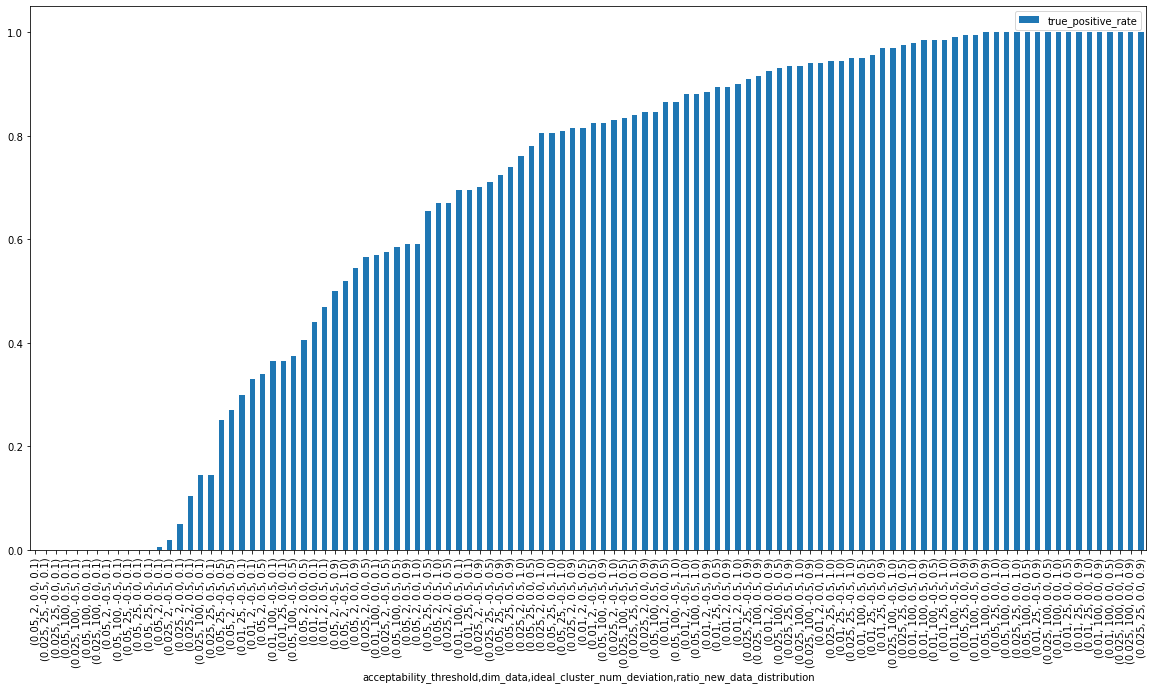

In [31]:
df_global_drift.set_index(cols_global_drift_params).plot(kind='bar', 
                                                         y='true_positive_rate',
                                                         figsize=(20,10)
                                                        )

In [32]:
(df_global_drift[cols_global_drift_params+['true_positive_rate']].corr()).round(4)

,acceptability_threshold,dim_data,ideal_cluster_num_deviation,ratio_new_data_distribution,true_positive_rate
acceptability_threshold,1.0000,-0.0000,-0.00,-0.0000,-0.3599
dim_data,-0.0000,1.0000,0.00,0.0000,0.1734
ideal_cluster_num_deviation,-0.0000,0.0000,1.00,0.0000,0.0800
ratio_new_data_distribution,-0.0000,0.0000,0.00,1.0000,0.7814
true_positive_rate,-0.3599,0.1734,0.08,0.7814,1.0000


#### Global drift disappearing distribution

In [33]:
df_global_disappearing = pd.read_csv(path_disappearing)
df_global_disappearing.dropna(subset=['filename'], inplace=True)
df_global_disappearing = df_global_disappearing[df_global_disappearing['dim_data']<=100]
df_global_disappearing.shape

(324, 40)

In [34]:
df_global_disappearing.head()

,Start Time,Duration,Run ID,Name,Source Type,Source Name,User,Status,acceptability_threshold,dim_data,drifting_clients,filename,ideal_cluster_num,ideal_cluster_num_deviation,initial_points_per_generator,m,max_iter_global,max_iter_local,mean_max_val,mean_min_val,n_clients,n_generators_per_client,n_repeats,n_time_steps,n_unused_client_generators,next_timestep_new_points_per_generator,num_clusters_used,ratio_drifted_clients,ratio_new_data_distribution,ratio_unused_client_generators,run_mode,tol_global,tol_local,drift_detected_counter,initial_global_db_max,initial_global_db_mean,initial_global_db_median,initial_global_db_min,initial_global_db_std,true_positive_rate
0,2024-01-11 08:06:17,270ms,ba11f67b883e468da203e11d217e556c,NaN,LOCAL,/home/morris/UM/phd/code/fed_drift_data_genera...,morris,FINISHED,0.05,100,5,None,10,0.5,1000,2,10,50,5,-5,10,1,20,10,9,100,15,0.5,1.0,0.9,global_drift_unused_generators,0.01,0.001,200,42178.547801,33269.606694,33389.035586,26307.887399,4334.130803,1.000
1,2024-01-11 08:05:31,270ms,7a6c477d40a34579a07e3ee3804ee857,NaN,LOCAL,/home/morris/UM/phd/code/fed_drift_data_genera...,morris,FINISHED,0.05,100,5,None,10,0.5,1000,2,10,50,5,-5,10,1,20,10,9,100,15,0.5,0.9,0.9,global_drift_unused_generators,0.01,0.001,200,42891.281055,35266.187265,36126.378666,25478.502126,4002.563191,1.000
2,2024-01-11 08:04:42,270ms,3c59847409a5492e8929ea5e9b7e7ac1,NaN,LOCAL,/home/morris/UM/phd/code/fed_drift_data_genera...,morris,FINISHED,0.05,100,5,None,10,0.5,1000,2,10,50,5,-5,10,1,20,10,9,100,15,0.5,0.5,0.9,global_drift_unused_generators,0.01,0.001,139,40996.541998,35639.180326,36603.135460,28527.990821,3749.967600,0.695
3,2024-01-11 08:03:53,281ms,6d0b97dd5b1046fcabefa28c5799d02a,NaN,LOCAL,/home/morris/UM/phd/code/fed_drift_data_genera...,morris,FINISHED,0.05,100,5,None,10,0.5,1000,2,10,50,5,-5,10,1,20,10,9,100,15,0.5,0.1,0.9,global_drift_unused_generators,0.01,0.001,139,44364.209648,33493.899867,33549.086681,22052.919208,4992.561819,0.695
4,2024-01-11 08:03:04,285ms,3a3bdad0f88a472bbcc292d9e38cca43,NaN,LOCAL,/home/morris/UM/phd/code/fed_drift_data_genera...,morris,FINISHED,0.05,100,5,None,10,0.5,1000,2,10,50,5,-5,10,1,20,10,5,100,15,0.5,1.0,0.5,global_drift_unused_generators,0.01,0.001,164,41230.562856,36267.302849,36673.212904,31415.529894,2377.603852,0.820


In [35]:
df_global_disappearing[df_global_disappearing['dim_data']==2]['filename'].loc[94]

'None'

In [36]:
df_global_disappearing[df_global_disappearing['dim_data']==2].sort_values('ratio_unused_client_generators').head(10)

,Start Time,Duration,Run ID,Name,Source Type,Source Name,User,Status,acceptability_threshold,dim_data,drifting_clients,filename,ideal_cluster_num,ideal_cluster_num_deviation,initial_points_per_generator,m,max_iter_global,max_iter_local,mean_max_val,mean_min_val,n_clients,n_generators_per_client,n_repeats,n_time_steps,n_unused_client_generators,next_timestep_new_points_per_generator,num_clusters_used,ratio_drifted_clients,ratio_new_data_distribution,ratio_unused_client_generators,run_mode,tol_global,tol_local,drift_detected_counter,initial_global_db_max,initial_global_db_mean,initial_global_db_median,initial_global_db_min,initial_global_db_std,true_positive_rate
323,2024-01-11 00:02:49,300ms,4ef1f9783c894bfcb43bd4b55c900028,NaN,LOCAL,/home/morris/UM/phd/code/fed_drift_data_genera...,morris,FINISHED,0.010,2,5,None,10,-0.5,1000,2,10,50,5,-5,10,1,20,10,1,100,5,0.5,0.1,0.1,global_drift_unused_generators,0.01,0.001,18,0.704504,0.537365,0.522985,0.444589,0.062304,0.090
298,2024-01-11 00:55:15,256ms,98ec9a683d0e4f96a6ddc9e66752d80e,NaN,LOCAL,/home/morris/UM/phd/code/fed_drift_data_genera...,morris,FINISHED,0.010,2,5,None,10,0.5,1000,2,10,50,5,-5,10,1,20,10,1,100,15,0.5,0.5,0.1,global_drift_unused_generators,0.01,0.001,132,0.553560,0.467876,0.483117,0.359210,0.062805,0.660
297,2024-01-11 01:03:14,239ms,456bdaf621a844f295423c787ce36227,NaN,LOCAL,/home/morris/UM/phd/code/fed_drift_data_genera...,morris,FINISHED,0.010,2,5,None,10,0.5,1000,2,10,50,5,-5,10,1,20,10,1,100,15,0.5,0.9,0.1,global_drift_unused_generators,0.01,0.001,173,0.657790,0.452152,0.449983,0.364851,0.063124,0.865
215,2024-01-11 02:44:01,270ms,8e70016b352a4336bf732d88c00261f8,NaN,LOCAL,/home/morris/UM/phd/code/fed_drift_data_genera...,morris,FINISHED,0.025,2,5,None,10,-0.5,1000,2,10,50,5,-5,10,1,20,10,1,100,5,0.5,0.1,0.1,global_drift_unused_generators,0.01,0.001,0,0.925188,0.557960,0.534271,0.493070,0.092879,0.000
104,2024-01-11 05:26:25,268ms,d9941a19c40442108e52a7ce031c1c69,NaN,LOCAL,/home/morris/UM/phd/code/fed_drift_data_genera...,morris,FINISHED,0.050,2,5,None,10,-0.5,1000,2,10,50,5,-5,10,1,20,10,1,100,5,0.5,1.0,0.1,global_drift_unused_generators,0.01,0.001,31,0.711833,0.551784,0.532704,0.474470,0.070521,0.155
105,2024-01-11 05:25:57,261ms,ad201331ecaf44d8bac7e4755322cf34,NaN,LOCAL,/home/morris/UM/phd/code/fed_drift_data_genera...,morris,FINISHED,0.050,2,5,None,10,-0.5,1000,2,10,50,5,-5,10,1,20,10,1,100,5,0.5,0.9,0.1,global_drift_unused_generators,0.01,0.001,8,0.702016,0.527906,0.528059,0.449056,0.055103,0.040
106,2024-01-11 05:25:34,254ms,a0f4328f4018413485faa858cdbe3212,NaN,LOCAL,/home/morris/UM/phd/code/fed_drift_data_genera...,morris,FINISHED,0.050,2,5,None,10,-0.5,1000,2,10,50,5,-5,10,1,20,10,1,100,5,0.5,0.5,0.1,global_drift_unused_generators,0.01,0.001,1,0.687027,0.566097,0.561069,0.454851,0.072918,0.005
107,2024-01-11 05:25:06,253ms,fdceeac1f8bf4812b66cff9992adaf90,NaN,LOCAL,/home/morris/UM/phd/code/fed_drift_data_genera...,morris,FINISHED,0.050,2,5,None,10,-0.5,1000,2,10,50,5,-5,10,1,20,10,1,100,5,0.5,0.1,0.1,global_drift_unused_generators,0.01,0.001,0,0.608129,0.521443,0.525507,0.433238,0.043032,0.000
214,2024-01-11 02:44:27,258ms,bfd666ca64054b05b5f7ec1d9ed4176f,NaN,LOCAL,/home/morris/UM/phd/code/fed_drift_data_genera...,morris,FINISHED,0.025,2,5,None,10,-0.5,1000,2,10,50,5,-5,10,1,20,10,1,100,5,0.5,0.5,0.1,global_drift_unused_generators,0.01,0.001,39,0.751058,0.522637,0.512746,0.420698,0.071419,0.195
95,2024-01-11 05:32:39,257ms,645567a91df249d1aab6bab6601e30f1,NaN,LOCAL,/home/morris/UM/phd/code/fed_drift_data_genera...,morris,FINISHED,0.050,2,5,None,10,0.0,1000,2,10,50,5,-5,10,1,20,10,1,100,10,0.5,0.1,0.1,global_drift_unused_generators,0.01,0.001,0,0.642495,0.520938,0.544311,0.407920,0.071812,0.000


In [37]:
cols_param_global_disappearing = cols_global_drift_params + ['ratio_unused_client_generators']

In [38]:
df_global_disappearing.drop_duplicates(subset=cols_param_global_disappearing, inplace=True)

In [40]:
mean_all_disappearing_drift = df_global_disappearing['true_positive_rate'].mean()

print(f'Mean true positive rate across all experiments: {mean_all_disappearing_drift:.4f}')

Mean true positive rate across all experiments: 0.6399


In [39]:
display_performance_per_param_col(df=df_global_disappearing,
                                  param_cols=cols_param_global_disappearing,
                                  metric_col='true_positive_rate'
                                 )

true_positive_rate                        
                                      mean  median  min  max count
acceptability_threshold                                           
0.010                             0.789444  0.8900  0.0  1.0   108
0.025                             0.636667  0.7275  0.0  1.0   108
0.050                             0.493611  0.5350  0.0  1.0   108

true_positive_rate                        
                       mean  median  min  max count
dim_data                                           
2                  0.598750  0.6950  0.0  1.0   108
25                 0.641898  0.7500  0.0  1.0   108
100                0.679074  0.7875  0.0  1.0   108

true_positive_rate                        
                                          mean  median  min  max count
ideal_cluster_num_deviation                                           
-0.5                                  0.479398  0.5200  0.0  1.0   108
 0.0                                  0.743750  0.9575  0.0  1.0   108
 0.5                                  0.696574  0.7650  0.0  1.0   108

true_positive_rate                        
                                          mean median   min  max count
ratio_new_data_distribution                                           
0.1                                   0.298889  0.115  0.00  1.0    81
0.5                                   0.686914  0.795  0.00  1.0    81
0.9                                   0.769753  0.860  0.04  1.0    81
1.0                                   0.804074  0.895  0.02  1.0    81

true_positive_rate                        
                                             mean  median  min  max count
ratio_unused_client_generators                                           
0.1                                      0.427593  0.4050  0.0  1.0   108
0.5                                      0.668704  0.7825  0.0  1.0   108
0.9                                      0.823426  0.9625  0.0  1.0   108

In [45]:
df_global_disappearing.sort_values('true_positive_rate', ascending=True, inplace=True)

<AxesSubplot:xlabel='acceptability_threshold,dim_data,ideal_cluster_num_deviation,ratio_new_data_distribution,ratio_unused_client_generators'>

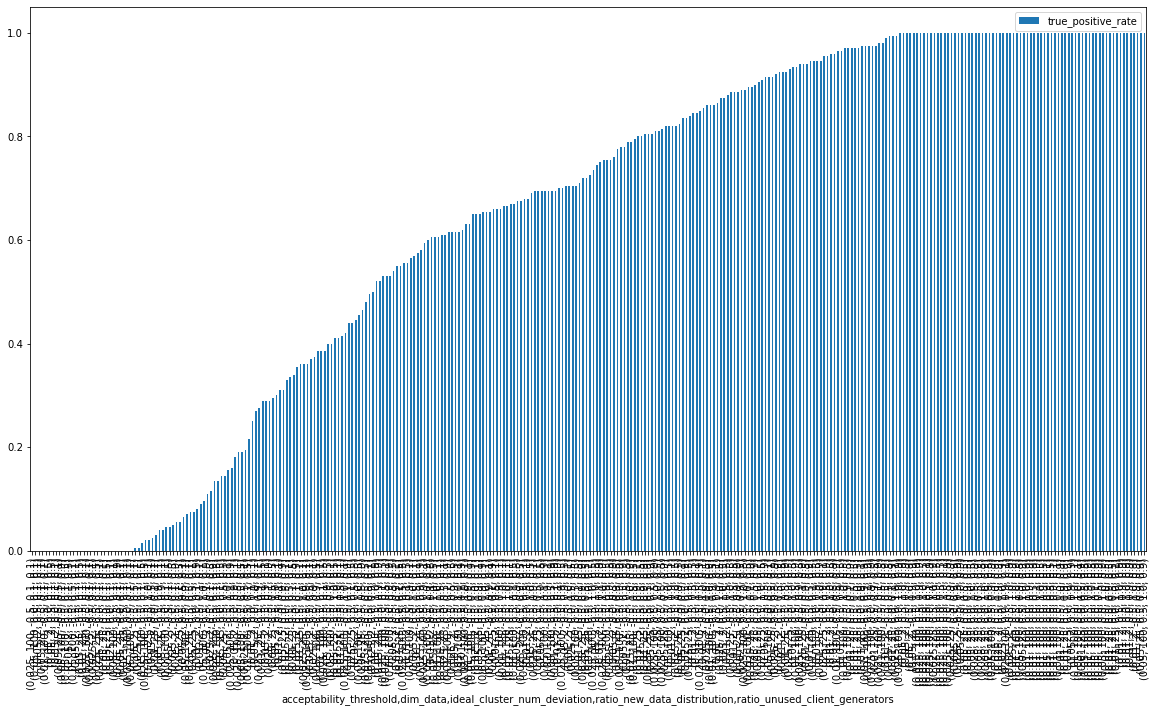

In [46]:
df_global_disappearing.set_index(cols_param_global_disappearing).plot(kind='bar', 
                                                                      y='true_positive_rate',
                                                                      figsize=(20,10)
                                                                      )

In [47]:
(df_global_disappearing[cols_global_drift_params+['true_positive_rate']].corr()).round(4)

,acceptability_threshold,dim_data,ideal_cluster_num_deviation,ratio_new_data_distribution,true_positive_rate
acceptability_threshold,1.000,-0.0000,-0.0000,-0.000,-0.3360
dim_data,-0.000,1.0000,-0.0000,-0.000,0.0872
ideal_cluster_num_deviation,-0.000,-0.0000,1.0000,-0.000,0.2499
ratio_new_data_distribution,-0.000,-0.0000,-0.0000,1.000,0.5350
true_positive_rate,-0.336,0.0872,0.2499,0.535,1.0000
